In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
import pyodbc as odbc

In [4]:
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [5]:
#Importing the dataset, read straight from SQL
dataset=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_50k', cnxn)
dataset.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,0.733344,-0.204605,0.981473,0.937163,-0.638095,-0.291008,1901.0,47803.0
1,0.105120,-0.652139,0.981473,1.525021,1.183265,0.552862,13588.0,25068.0
2,0.942753,0.242928,-1.705279,0.937163,0.576145,-0.122234,2824.0,518.0
3,1.570978,-1.994739,-1.705279,-1.414272,0.576145,0.426281,3763.0,5135.0
4,-0.523105,1.137995,0.085889,-0.826413,-0.638095,1.481118,9820.0,21753.0
5,0.384331,1.137995,-0.809695,-0.826413,-1.245215,1.227957,6369.0,15929.0
6,-0.872119,-0.652139,0.981473,0.937163,-0.030975,-1.029394,872.0,34634.0
7,-1.919161,0.242928,-1.705279,1.525021,-1.245215,0.257507,3936.0,5914.0
8,-0.383500,0.690462,-0.809695,-0.238555,1.790385,-1.008297,876.0,34730.0
9,-0.174092,1.585529,-1.705279,1.525021,-1.245215,1.502215,8742.0,20344.0


In [6]:
#Defining X and y
X=dataset.iloc[:,0:6].values
y=dataset.iloc[:,-2].values

In [7]:
X

array([[ 0.73334442, -0.20460509,  0.98147332,  0.93716275, -0.63809506,
        -0.29100792],
       [ 0.10511955, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
         0.55286174],
       [ 0.94275271,  0.24292836, -1.70527938,  0.93716275,  0.57614496,
        -0.12223399],
       ...,
       [ 0.73334442, -1.09967199, -0.80969515, -0.23855468,  1.79038498,
        -1.05049061],
       [ 3.38584943,  0.24292836, -2.60086361,  0.34930404, -1.24521508,
         0.46847477],
       [ 0.10511955, -0.20460509,  0.98147332, -0.23855468,  1.79038498,
        -0.48087859]])

In [8]:
y

array([ 1901., 13588.,  2824., ...,   635.,  3633.,  2217.])

In [9]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
#Training the model - for initial training use defult parameters
import time
start = time.time()

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=0,n_estimators=100, criterion='mse')
regressor.fit(X_train,y_train)

train_time = time.time() - start

In [11]:
train_time

6.912376403808594

In [12]:
import time
start = time.time()
y_pred=regressor.predict(X_test)
y_pred10k_time = time.time() - start
y_pred

array([2873.96  ,  747.826 , 1929.57  , ...,  895.5   , 4614.05  ,
        778.9825])

In [13]:
y_test

array([2927.,  610., 2220., ...,  899., 4588.,  825.])

In [14]:
from sklearn import metrics
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("R2_Score:",metrics.r2_score(y_test,y_pred))

Mean squared error 288752.04873943736
Mean absolute error 276.9537594920108
R2_Score: 0.9814705902975714


In [15]:
y_pred10k_time

0.22606754302978516

In [16]:
regressor.score(X_train, y_train)

0.9972002549340908

In [17]:
regressor.score(X_test, y_test)

0.9814705902975714

In [18]:
trained_records = []
trained_records.append({
    'model': 'RandomForestRegressor(MSE)',
    'train_time': train_time,
    'test_time': y_pred10k_time,
    'train_r2': regressor.score(X_train, y_train),
    'test_r2': regressor.score(X_test, y_test),
    'test_MSE': metrics.mean_squared_error(y_test,y_pred),
    'test_MAE': metrics.mean_absolute_error(y_test,y_pred)})
trained_records

[{'model': 'RandomForestRegressor(MSE)',
  'train_time': 6.912376403808594,
  'test_time': 0.22606754302978516,
  'train_r2': 0.9972002549340908,
  'test_r2': 0.9814705902975714,
  'test_MSE': 288752.04873943736,
  'test_MAE': 276.9537594920108}]

In [19]:
trained_records = pd.DataFrame(trained_records,columns=['model','train_time','test_time','train_r2','test_r2','test_MSE','test_MAE'])
trained_records

,model,train_time,test_time,train_r2,test_r2,test_MSE,test_MAE
0,RandomForestRegressor(MSE),6.912376,0.226068,0.9972,0.981471,288752.048739,276.953759


In [20]:
import sys
import pyodbc as odbc
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [31]:
cursor = cnxn.cursor()
trained_insert = '''INSERT INTO ML_Parameter_Score_05oct (Model,Training_Time_40k_rows,Test_Time_10k_rows,Train_r2_score,Test_r2_score,Test_MSE,Test_MAE)
               VALUES (?,?,?,?,?,?,?)'''
for rec in trained_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['train_time'],
        rec[1]['test_time'],
        rec[1]['train_r2'],
        rec[1]['test_r2'],
        rec[1]['test_MSE'],
        rec[1]['test_MAE']
    )
cursor.execute(trained_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!


In [21]:
Comparison=pd.DataFrame({"Actual:":y_test,"Predicted:":y_pred})
print(Comparison.to_string())

      Actual:    Predicted:
0      2927.0   2873.960000
1       610.0    747.826000
2      2220.0   1929.570000
3      5147.0   5680.010000
4     17227.0  16687.096667
5      4739.0   5495.836071
6      1024.0   1020.015571
7      5798.0   4213.877000
8      6350.0   6307.439167
9       556.0    530.421333
10      880.0    724.390667
11     1404.0   1622.440000
12      577.0    411.510000
13      505.0    491.970000
14      844.0    759.672429
15      789.0    787.380000
16      854.0    967.508333
17     2123.0   2170.645500
18     5488.0   5527.116000
19     2964.0   2647.080000
20      743.0    677.461167
21      789.0    794.110000
22     6028.0   5997.000000
23     1013.0    793.335111
24     1125.0   1321.450000
25     2397.0   2329.505833
26      803.0    767.270000
27     2348.0   2206.943333
28      753.0    822.375000
29     2343.0   2485.890000
30     2096.0   2242.843333
31      572.0    585.420000
32     5816.0   5819.147024
33     4257.0   4276.760000
34    16294.0  15094

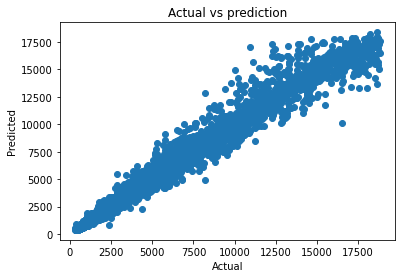

In [22]:
#Visualize
plt.scatter(y_test,y_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [23]:
#Importing the dataset SET ASIDE FOR INPUT TO PREDICT, read straight from SQL
input_data=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_tail_3940', cnxn)
input_data.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,-0.243894,-0.652139,0.981473,-1.414272,2.397505,-0.987200,694.0,29200.0
1,-0.034486,-0.652139,0.981473,1.525021,1.183265,-0.607459,2718.0,53703.0
2,-0.941922,1.585529,0.085889,-0.238555,-1.245215,2.535955,17136.0,27011.0
3,-0.523105,-0.204605,0.981473,0.937163,-0.030975,-0.565266,1727.0,46017.0
4,0.454133,0.242928,-0.809695,-1.414272,-0.638095,-1.008297,388.0,41584.0
5,0.523936,-0.652139,0.981473,0.937163,-0.030975,-0.523072,2030.0,48842.0
6,-0.872119,-0.652139,0.981473,1.525021,-0.030975,-1.008297,758.0,31322.0
7,0.733344,-1.994739,0.981473,-0.238555,1.790385,-1.029394,1046.0,38798.0
8,-1.779555,1.137995,-0.809695,0.349304,-0.638095,-0.206621,2453.0,52058.0
9,-1.570147,1.137995,0.085889,0.349304,-0.030975,-1.008297,773.0,31770.0


In [24]:
#Defining X and y FROM INPUT
inp_X=input_data.iloc[:,0:6].values
inp_y=input_data.iloc[:,-2].values

In [25]:
inp_X

array([[-0.24389427, -0.65213854,  0.98147332, -1.41427211,  2.397505  ,
        -0.98720039],
       [-0.03448598, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
        -0.60745904],
       [-0.94192191,  1.58552871,  0.08588908, -0.23855468, -1.24521508,
         2.53595544],
       ...,
       [ 2.12939968, -0.65213854, -2.60086361, -0.23855468,  1.18326497,
         1.48111837],
       [-2.05876612,  0.69046181,  0.08588908,  1.52502147, -1.24521508,
         0.44737803],
       [ 0.24472507, -0.65213854,  0.98147332, -2.00213083, -1.24521508,
         0.42628129]])

In [26]:
inp_y

array([  694.,  2718., 17136., ..., 13553.,  4672.,  3528.])

In [27]:
inpy_pred=regressor.predict(inp_X)
inpy_pred

array([  847.79 ,  2701.79 , 12527.765, ..., 13583.75 ,  3823.49 ,
        3373.61 ])

In [28]:
print("Mean squared error",metrics.mean_squared_error(inp_y,inpy_pred))
print("Mean absolute error",metrics.mean_absolute_error(inp_y,inpy_pred))
print("R2_Score:",metrics.r2_score(inp_y,inpy_pred))

Mean squared error 364777.7518585705
Mean absolute error 308.60639051500175
R2_Score: 0.9788707159663871


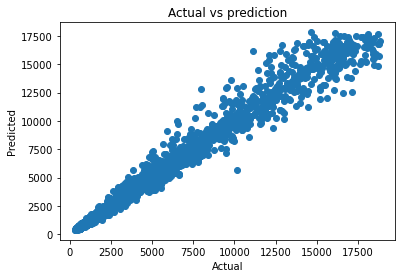

In [29]:
#Visualize
plt.scatter(inp_y,inpy_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [30]:
Comparison=pd.DataFrame({"Actual:":inp_y,"Predicted:":inpy_pred})
print(Comparison.to_string()) 

      Actual:    Predicted:
0       694.0    847.790000
1      2718.0   2701.790000
2     17136.0  12527.765000
3      1727.0   1662.301333
4       388.0    430.434000
5      2030.0   1737.130667
6       758.0    930.368333
7      1046.0    910.931500
8      2453.0   2481.680000
9       773.0    644.423000
10     1289.0   1332.110000
11    13908.0  13667.568333
12      689.0    641.577500
13      814.0    829.776667
14     2646.0   2587.527333
15    12291.0  10716.375833
16     4963.0   4903.217143
17     1122.0   1240.975833
18     5350.0   4940.740000
19      770.0    933.681000
20     7764.0   7762.853333
21     1219.0   1338.200000
22     1662.0   1765.775333
23      593.0    515.463333
24     1061.0    961.330643
25     2264.0   2302.570000
26      827.0    994.704500
27     4821.0   3733.746000
28    18741.0  15703.080000
29     8055.0   7761.505833
30     5846.0   5497.190000
31     4315.0   4288.480000
32     1046.0   1005.226667
33    11365.0  11133.350690
34      696.0    736

In [42]:
import time
start = time.time()
inpy_pred=regressor.predict(inp_X)
inpy_pred3940_time = time.time() - start
inpy_pred

array([  847.79 ,  2701.79 , 12527.765, ..., 13583.75 ,  3823.49 ,
        3373.61 ])

In [43]:
regressor.score(inp_X, inp_y)

0.9788707159663871

In [44]:
inpy_pred3940_time

0.12051677703857422

In [45]:
prediction_records = []
prediction_records.append({
    'model': 'RandomForestRegressor(MSE)',
    'prediction_time': inpy_pred3940_time,
    'r2': regressor.score(inp_X, inp_y),
    'MSE': metrics.mean_squared_error(inp_y,inpy_pred),
    'MAE': metrics.mean_absolute_error(inp_y,inpy_pred)})
prediction_records

[{'model': 'RandomForestRegressor(MSE)',
  'prediction_time': 0.12051677703857422,
  'r2': 0.9788707159663871,
  'MSE': 364777.7518585705,
  'MAE': 308.60639051500175}]

In [46]:
prediction_records = pd.DataFrame(prediction_records,columns=['model','prediction_time','r2','MSE','MAE'])
prediction_records

,model,prediction_time,r2,MSE,MAE
0,RandomForestRegressor(MSE),0.120517,0.978871,364777.751859,308.606391


In [47]:
cursor = cnxn.cursor()
prediction_insert = '''INSERT INTO ML_Predictions_Score_05oct (Model,Prediction_Time_3940_rows,Prediction_r2,Prediction_MSE,Prediction_MAE)
               VALUES (?,?,?,?,?)
'''
for rec in prediction_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['prediction_time'],
        rec[1]['r2'],
        rec[1]['MSE'],
        rec[1]['MAE']
    )
cursor.execute(prediction_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!


In [46]:
Trained_ML_predictions = pd.DataFrame(prediction_records,columns=['model','prediction_time','r2','MSE','MAE'])
prediction_records

,model,prediction_time,r2,MSE,MAE
0,RandomForestRegressor(MSE),0.120517,0.978871,364777.751859,308.606391


In [31]:
Comparison

,Actual:,Predicted:
0,694.0,847.790000
1,2718.0,2701.790000
2,17136.0,12527.765000
3,1727.0,1662.301333
4,388.0,430.434000
...,...,...
3935,5096.0,5253.643333
3936,1866.0,2262.416000
3937,13553.0,13583.750000
3938,4672.0,3823.490000


In [34]:
Comparison_df=pd.DataFrame({"Index Original":input_data.index_org,"Input Actual:":inp_y,"Trained ML Predicted:":inpy_pred})
Comparison_df

,Index Original,Input Actual:,Trained ML Predicted:
0,29200.0,694.0,847.790000
1,53703.0,2718.0,2701.790000
2,27011.0,17136.0,12527.765000
3,46017.0,1727.0,1662.301333
4,41584.0,388.0,430.434000
...,...,...,...
3935,11825.0,5096.0,5253.643333
3936,47508.0,1866.0,2262.416000
3937,25015.0,13553.0,13583.750000
3938,9818.0,4672.0,3823.490000


In [36]:
cursor = cnxn.cursor()

In [37]:
#Create Parameter_Score_Table
cursor.execute('''
                CREATE TABLE Trained_ML_Predictions
                (Index_original int,
                 Input_actual float,
                 Trained_ML_predicted float,
                )
''')
cnxn.commit()

In [39]:
trainedmlpred_insert = '''INSERT INTO Trained_ML_Predictions (Index_original,Input_actual,Trained_ML_predicted)
               VALUES (?,?,?)
'''
cursor.fast_executemany = True
cursor.executemany(trainedmlpred_insert, Comparison_df.values.tolist())
cnxn.commit()
cursor.close()
print("Input Comparison Values Done!")

#OK works.

Input Comparison Values Done!
